Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7733 - loss: 0.8771 - val_accuracy: 0.9316 - val_loss: 0.2415
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9303 - loss: 0.2365 - val_accuracy: 0.9469 - val_loss: 0.1734
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9494 - loss: 0.1742 - val_accuracy: 0.9498 - val_loss: 0.1664
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9556 - loss: 0.1501 - val_accuracy: 0.9605 - val_loss: 0.1243
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9633 - loss: 0.1231 - val_accuracy: 0.9643 - val_loss: 0.1194
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9676 - loss: 0.1084 - val_accuracy: 0.9691 - val_loss: 0.1019
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9722 - loss: 0.0914 - val_accuracy: 0.9714 - val_loss: 0.0969
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9740 - loss: 0.0879 - 

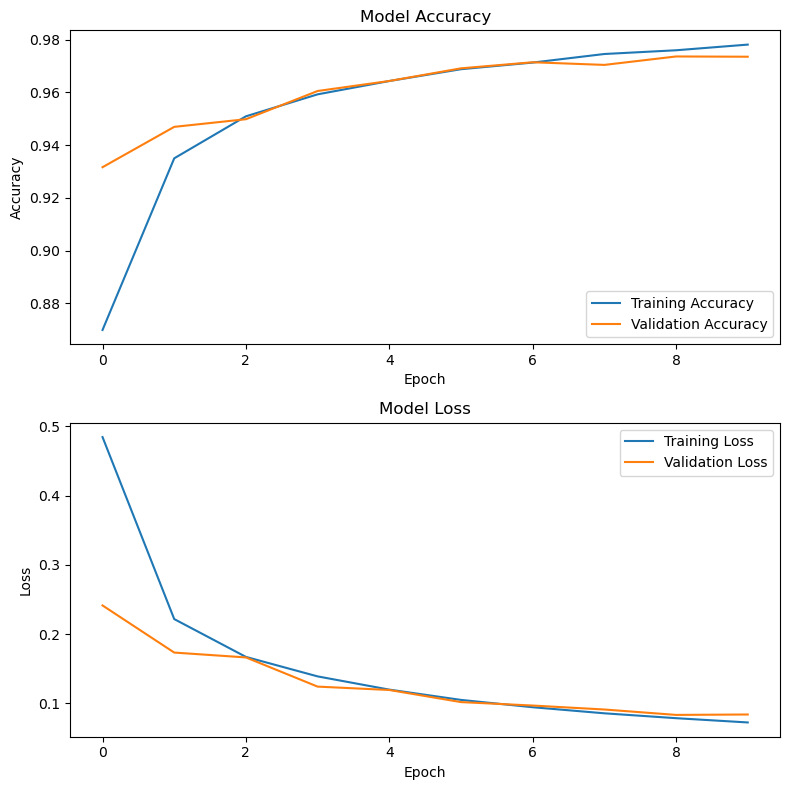

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Loading and preprocessing the image data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 2. Defining the model's architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 3. Training the model
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

# 4. Estimating the model's performance
# Plot accuracy and loss
plt.figure(figsize=(8, 8))

# Accuracy plot
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

